In [9]:
from data_loader import get_data
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [10]:
import os
from early_tde_classification.config import Config

feat_path = os.path.join(Config.OUT_FEATURES_DIR, 'features_all.csv')
data, features = get_data(feat_path)

# Split TDE from the rest
tde_mask = data['type']=='TDE'
tde_features = features[tde_mask]
features = features[~tde_mask]

# Split the rest
X_train, X_test = train_test_split(pd.DataFrame(features), test_size=0.3, random_state=1)

# Create label arrays
y_train, y_test = np.zeros(len(X_train)), np.zeros(len(X_test))

# Add TDEs back in the train
X_train = pd.concat([X_train, pd.DataFrame(tde_features)])

# Add TDE labels
y_train = np.append(y_train, np.ones(len(tde_features)))


clf = RandomForestClassifier(min_samples_leaf=.1, random_state=3, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=0.1,
                       random_state=3)

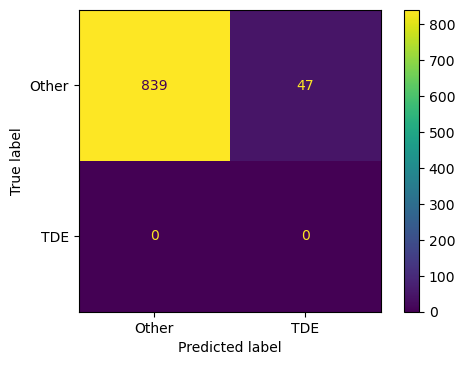

In [13]:
cm = confusion_matrix(y_test, clf.predict(X_test)) #, normalize='pred'

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Other', 'TDE']).plot()

In [14]:
print('Objects classified as TDEs:')
guess_TDE = data.iloc[(X_test[clf.predict(X_test)==1]).index]
guess_TDE.to_csv(os.path.join(Config.OUT_RF_CLASSIFIER, 'tde_candidates.csv'), index = False)

Objects classified as TDEs:


In [15]:
print('Very good candidates (sharp cut):')
guess_TDE[guess_TDE['rise_time'] > 4]

Very good candidates (sharp cut):


,objId,alertId,type,norm,ref_time,amplitude,rise_time,temperature,r_chisq,err_ref_time,err_amplitude,err_rise_time,err_temperature,std_flux_g,std_flux_r,std_snr_g,std_snr_r,sigmoid_dist,snr_rise_time,snr_amplitude,Fvar,nb_points,data_origin
1554,ZTF19aanwsuq,2003284511215015010,Seyfert_1,3140.961979,2.458963e+06,3.163972,42.901217,13298.281157,1.481519,18.067834,0.996216,21.286994,2669.451886,0.200507,0.057316,2.452618,0.879340,1.874273,2.015372,3.175989,0.000000,12.0,extragal
50,ZTF18acnmwfz,1772468005415015003,QSO,1977.516817,2.459161e+06,1.874370,20.154911,10784.031247,0.349908,17.044442,0.254987,13.344641,1125.978736,0.097434,0.079832,0.959218,1.072672,5.756500,1.510337,7.350833,0.000000,27.0,extragal
1930,ZTF18aaltywj,1383096262315015004,QSO_Candidate,2291.789158,2.460029e+06,9.999857,95.259553,21548.179967,2.864413,60.660146,1.932637,31.239456,3056.385240,0.162939,0.054016,2.416483,1.184878,0.369927,3.049335,5.174204,0.155448,15.0,extragal
839,ZTF21aavfigy,2349229353015015005,Unknown,2260.999565,2.460042e+06,2.374700,9.360217,11228.865438,1.464441,5.131295,1.290873,5.699094,3776.586860,-1.000000,0.136179,-1.000000,1.993208,3.962247,1.642404,1.839608,0.392326,7.0,extragal
2951,ZTF18abufhtw,1748250330415010003,AGN_Candidate,4821.103516,2.460178e+06,2.030063,14.604444,10902.355875,0.448137,6.593670,0.117181,4.879992,469.325909,0.089189,0.071787,3.497149,2.928695,7.570582,2.992719,17.324184,0.167041,37.0,extragal
2671,ZTF19acfcjgq,2059379732615015020,QSO,3127.829373,2.460144e+06,2.546118,20.393786,13786.086763,0.316255,17.264186,0.442041,12.936825,1346.612764,0.092480,0.046393,1.449607,1.660038,5.345105,1.576414,5.759916,0.227431,38.0,extragal
2491,ZTF18aarsrtf,1704264474315015009,Unknown,5032.354977,2.459669e+06,2.354409,20.849504,13136.915544,6.431731,5.523911,0.789674,9.080498,3059.441725,0.191877,-1.000000,2.286606,-1.000000,4.256335,2.296075,2.981494,0.278174,13.0,extragal
2268,ZTF18acbxoep,1711330183615010007,Unknown,1817.501349,2.459362e+06,1.843428,26.512455,10104.680671,0.388793,13.013119,0.267922,17.653397,1093.677842,0.105977,0.093577,0.787175,0.747621,3.759080,1.501833,6.880476,0.074221,28.0,extragal
2364,ZTF18aaxzhgj,2001262620815015002,Seyfert_1,1978.754760,2.459620e+06,2.527869,38.261541,13202.229700,1.526274,17.722471,0.743800,19.729000,2402.709540,0.143185,0.054467,1.806319,0.461010,3.172191,1.939355,3.398585,0.255799,22.0,extragal
1377,ZTF18abdrhon,1546420113615015004,Seyfert_1,2527.986886,2.459203e+06,2.282951,27.482973,10328.971597,0.578741,8.456282,0.486501,10.541645,1155.856706,0.119572,0.154311,2.356752,2.064705,2.442321,2.607086,4.692594,0.169311,15.0,extragal


In [16]:
os.path.join(Config.OUT_RF_CLASSIFIER, 'tde_candidates.csv')

'/home/lmiguel/gitlab_projects/TDE classification/tde_classification/early_tde_classification/../data/output/RF_classifier/tde_candidates.csv'